In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("adult(cleaned).csv")

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x = df.drop('income', axis = 1)
y = df[['income']]
x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(), random_state=42, stratify=y)

In [46]:
from sklearn.svm import SVC

In [47]:
model = SVC(kernel='rbf', C=10, gamma=0.001)

In [48]:
model.fit(x_train, y_train)

SVC(C=10, gamma=0.001)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

def metrics(y_test, y_pred):
    print(f"accuracy : {accuracy_score(y_test, y_pred)}" )
    print(f"recall : {recall_score(y_test, y_pred)}" )
    print(f"precision : {precision_score(y_test, y_pred)}" )
    print(f"f1 : {f1_score(y_test, y_pred)}" )
    cm = confusion_matrix(y_test, y_pred)
    print(f"confusion matrix: {cm}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

accuracy : 0.827868139514656
recall : 0.4877365101611773
precision : 0.7291775798847564
f1 : 0.5845055637203443
confusion matrix: [[8126  517]
 [1462 1392]]


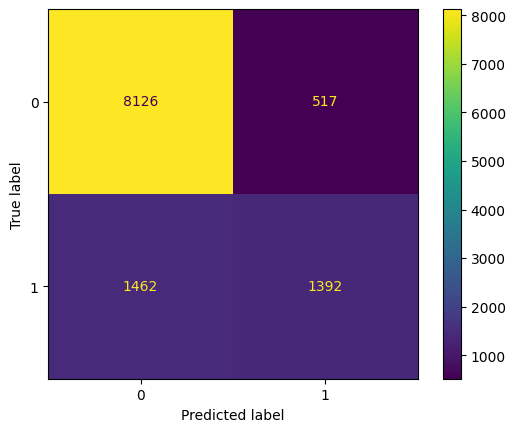

In [50]:
y_pred = model.predict(x_test)
metrics(y_test, y_pred)

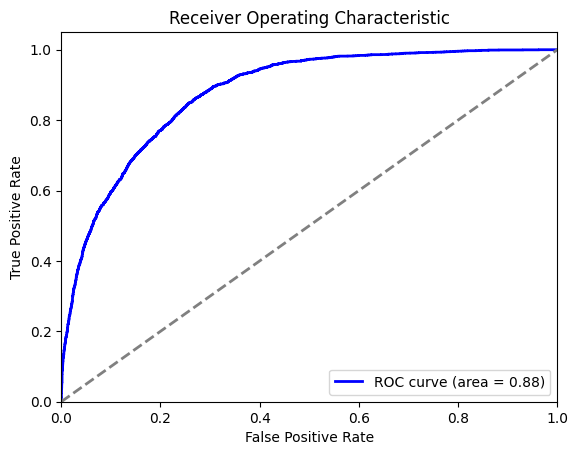

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the test set
y_scores = model.decision_function(x_test)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_scores))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### HyperParam Tuning

param_grid = {
    #'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    #'kernel': ['linear', 'rbf'],
}

from sklearn.model_selection import GridSearchCV

grid_kn=GridSearchCV(estimator=model,#model
                     param_grid=param_grid, #params
                    scoring='recall',# Strategy to evaluate the performance of the cross-validation model on the test set.
                    cv= 10, # Cross-validation generator
                    verbose= 1, #Time to calculate
                    n_jobs= -1 #Help to cpu 
                    )
grid_kn.fit(x_train,y_train.ravel())

grid_kn.best_params_